In [ ]:
Reading data using pandas

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df=pd.read_csv('spam.csv')

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
df.duplicated().sum()

415

In [7]:
df.isnull().sum()
df.duplicated().sum()

415

In [8]:
df.drop_duplicates()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.shape

(5572, 2)

In [11]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

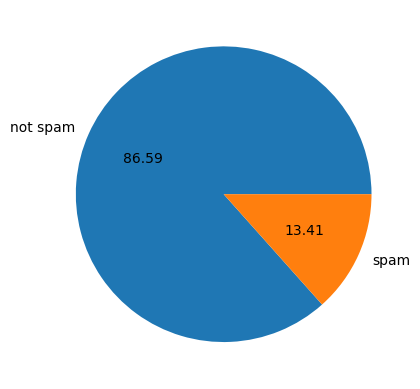

In [12]:
plt.pie(df['Category'].value_counts(),labels=['not spam','spam'],autopct='%0.2f')
plt.show()

In [ ]:
 Preprocessing the text
 we have already converted the text into lower case
 Steps to be done: removing numbers, removing punctuation, removing white spaces,
 removing hyperlink, removing stop words, Word Stemming or Word lemmatization

In [16]:
 from nltk.stem import WordNetLemmatizer
 #as Lemmatization has higher accuracy than stemming, we prefer lemmatization.

In [18]:
from wordcloud import STOPWORDS, WordCloud

In [20]:
#removing punctuations and numericals
for i in range(df.shape[0]):
    
     txt=df.iloc[i,1]
     s=""
     for word in txt: 
         word.strip("1234567890!@#$%^&*()_+-=:;/<>,.?'/ ")
         s=word+" "
     txt=" ".join(s)

In [21]:
lemmatizer = WordNetLemmatizer()

In [24]:
spam=""
ham=""
for i in range(df.shape[0]):
    #removing stop words 
    lemma_words = [lemmatizer.lemmatize(o) for o in df.iloc[i,1]]
    df.iloc[i,1]="".join(lemma_words)
    if(df.iloc[i,0]=="spam"):
        spam=spam+" "+df.iloc[i,1]
    else: 
        ham=ham+" "+df.iloc[i,1]
 #print(spam,ham)

In [25]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
Spam Worldcloud

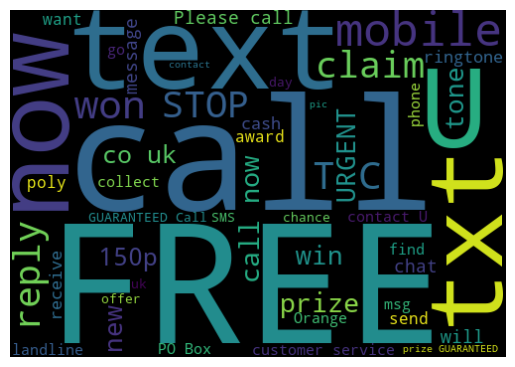

In [26]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    stopwords=STOPWORDS, max_words=50, width=500, height=350
    ).generate(spam)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

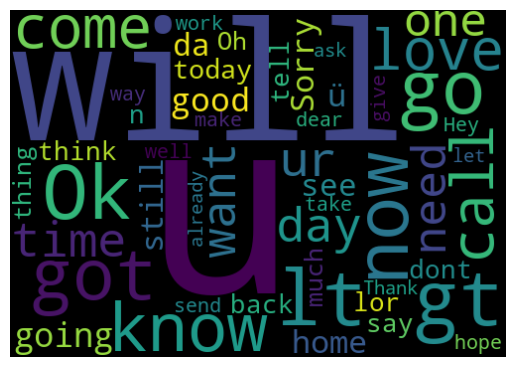

In [28]:
wordcloud = WordCloud(
    stopwords=STOPWORDS, max_words=50, width=500, height=350
    ).generate(ham)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
spam_corpus=list(spam.split())
from collections import Counter
Counter(spam_corpus)
Counter(spam_corpus).most_common(30)
print(Counter(spam_corpus).most_common(30))
d={}
for (i,j) in Counter(spam_corpus).most_common(30):
    d[i]=j
print(d)

[('to', 604), ('a', 360), ('your', 187), ('or', 185), ('call', 183), ('the', 175), ('2', 169), ('for', 169), ('you', 164), ('is', 142), ('Call', 136), ('on', 136), ('have', 125), ('and', 119), ('from', 116), ('ur', 107), ('with', 101), ('&', 98), ('4', 93), ('of', 93), ('FREE', 89), ('mobile', 81), ('You', 77), ('are', 77), ('our', 76), ('To', 73), ('claim', 71), ('Your', 71), ('U', 70), ('txt', 68)]
{'to': 604, 'a': 360, 'your': 187, 'or': 185, 'call': 183, 'the': 175, '2': 169, 'for': 169, 'you': 164, 'is': 142, 'Call': 136, 'on': 136, 'have': 125, 'and': 119, 'from': 116, 'ur': 107, 'with': 101, '&': 98, '4': 93, 'of': 93, 'FREE': 89, 'mobile': 81, 'You': 77, 'are': 77, 'our': 76, 'To': 73, 'claim': 71, 'Your': 71, 'U': 70, 'txt': 68}


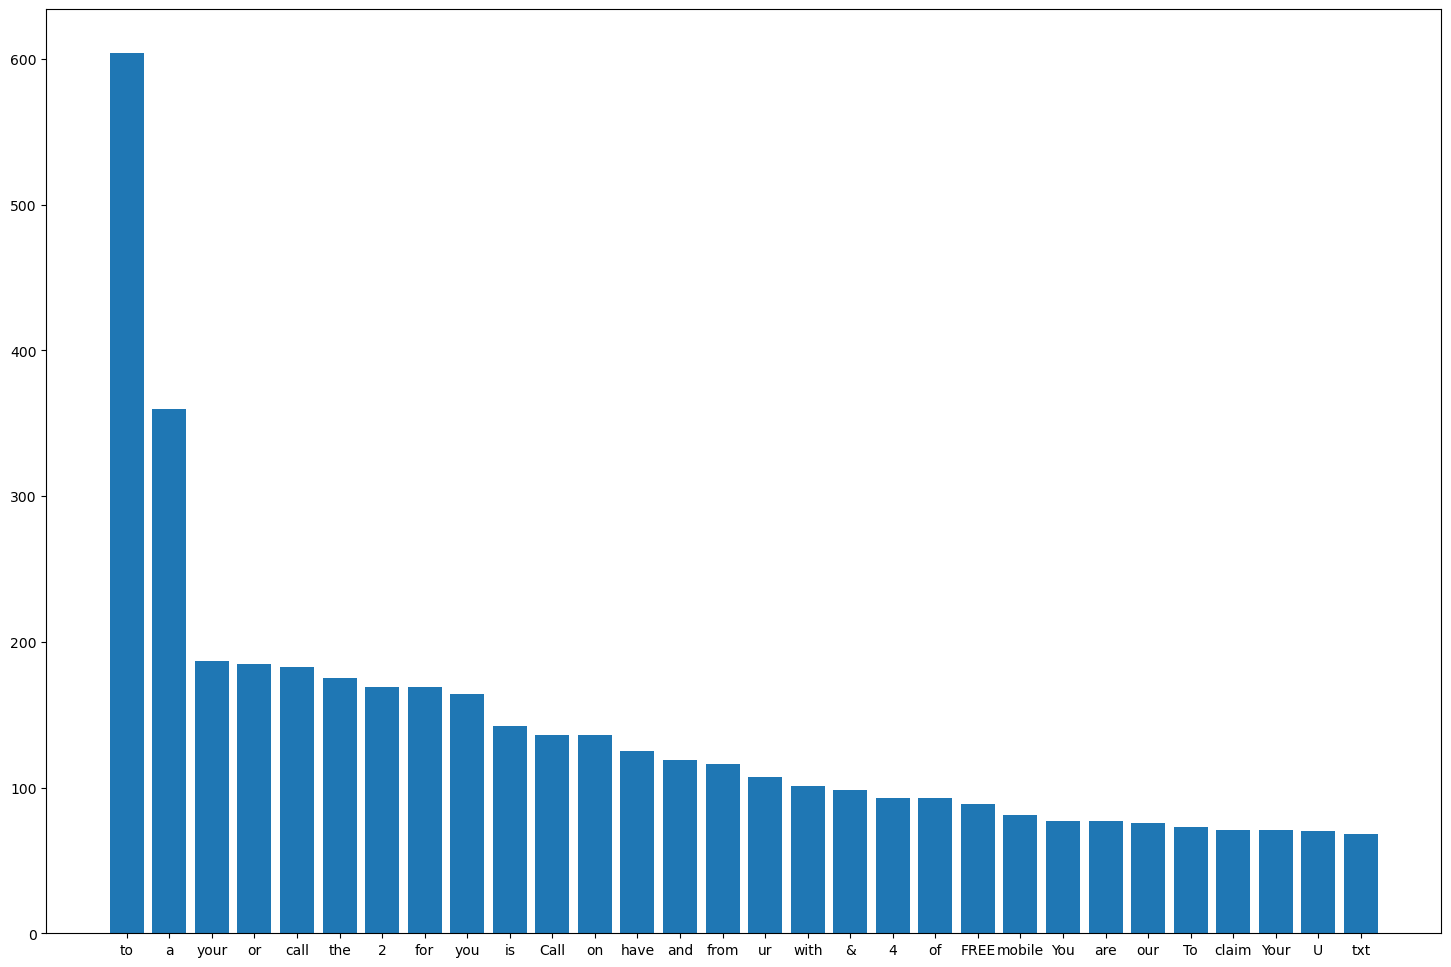

In [30]:
plt.figure(figsize=(18,12))
names = list(d.keys())
values = list(d.values())
plt.bar(range(len(d)), values, tick_label=names)
plt.show()

In [31]:
ham_corpus=list(ham.split())
from collections import Counter
Counter(ham_corpus)
Counter(ham_corpus).most_common(30)
print(Counter(ham_corpus).most_common(30))
d={}
for (i,j) in Counter(ham_corpus).most_common(30):
     d[i]=j

[('to', 1538), ('you', 1462), ('I', 1439), ('the', 1029), ('a', 977), ('i', 742), ('and', 739), ('in', 736), ('u', 651), ('is', 645), ('my', 621), ('me', 541), ('of', 499), ('for', 481), ('that', 399), ('it', 376), ('your', 374), ('on', 352), ('have', 349), ('at', 334), ('not', 324), ('are', 320), ('be', 315), ('will', 294), ('2', 288), ('get', 281), ('can', 279), ("I'm", 278), ('but', 277), ('&lt;#&gt;', 276)]


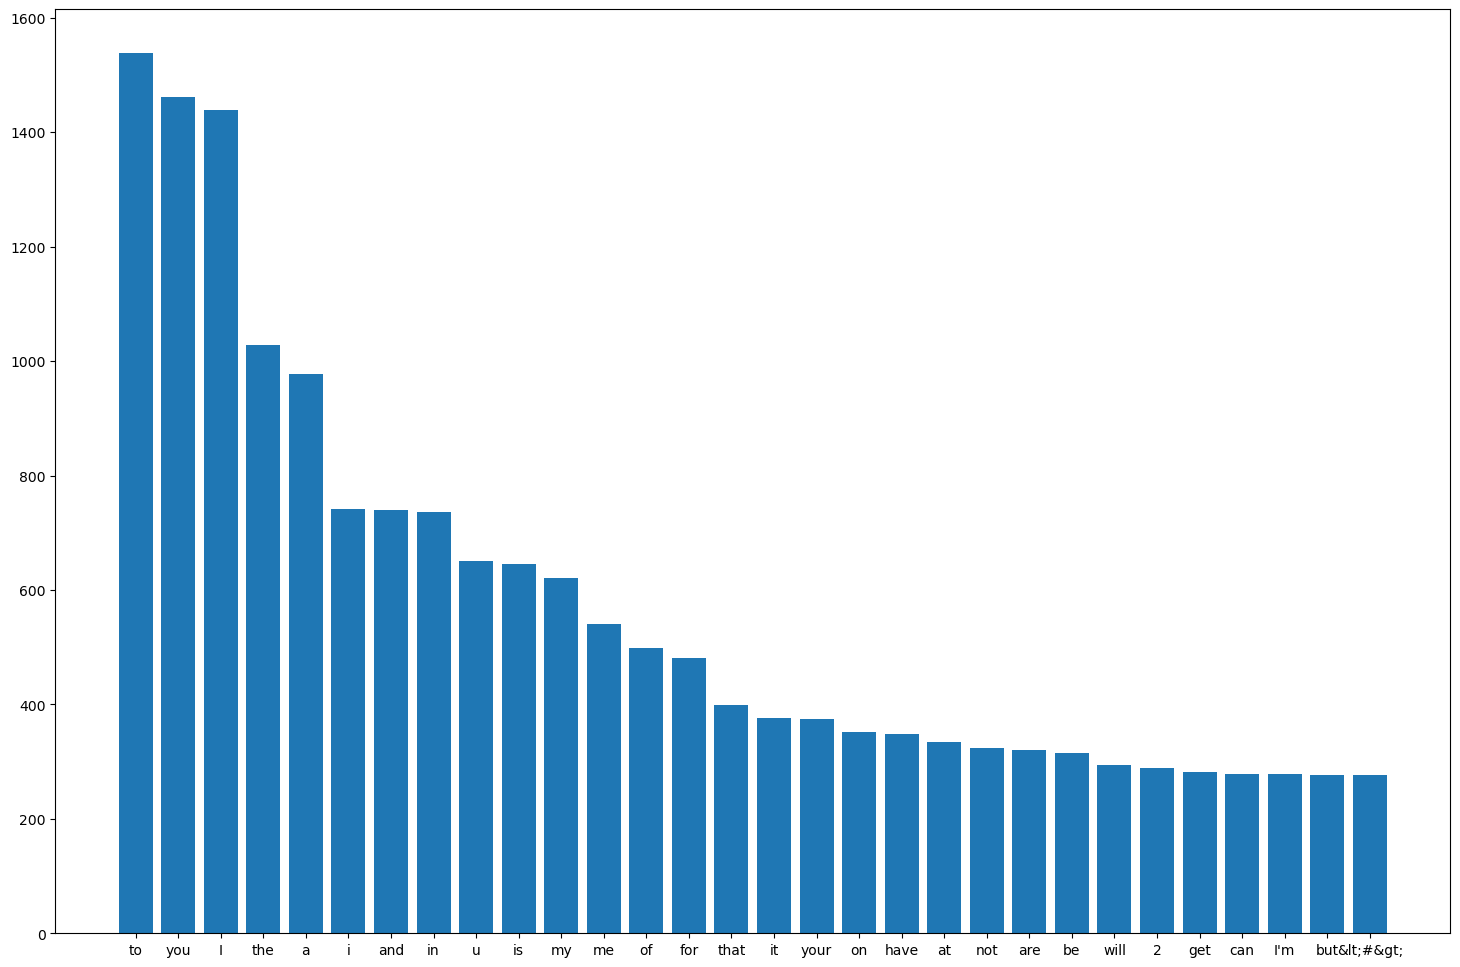

In [32]:
 plt.figure(figsize=(18,12))
 names = list(d.keys())
 values = list(d.values())
 plt.bar(range(len(d)), values, tick_label=names)
 plt.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [34]:
 cntVect = CountVectorizer(decode_error='ignore')
 x = cntVect.fit_transform(df['Message'])
 x_train, x_test, y_train, y_test = train_test_split(x, df['Category'], test_size=0.3, random_state=20)

In [ ]:
importing Naivebayes classifier model

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
nb=GaussianNB()

In [37]:
#training the model
nb.fit(x_train.toarray(),y_train)

GaussianNB()

In [39]:
#check for accuracy
#on training set
print(nb.score(x_train.toarray(),y_train))
#on test set
print(nb.score(x_test.toarray(),y_test))

0.95
0.8953349282296651


In [ ]:
Evaluating model

In [40]:
from sklearn import metrics

In [41]:
pred=nb.predict(x_test.toarray())
confusion_matrix = metrics.confusion_matrix(y_test,pred)

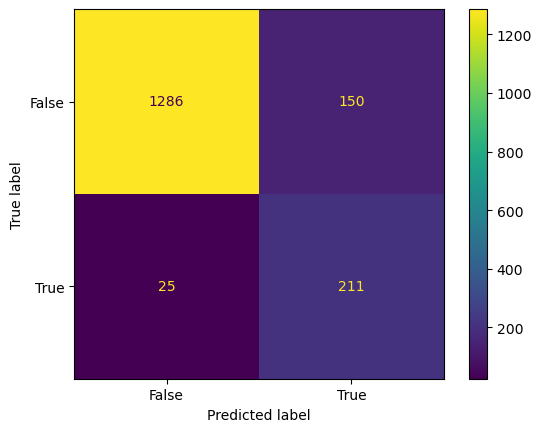

In [45]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =['False', 'True'])
cm_display.plot()
plt.show()                              

In [46]:
 from sklearn import svm
 from sklearn.svm import SVC

In [51]:
sv = SVC(random_state = 0)
sv.fit(x_train.toarray(),y_train)

SVC(random_state=0)

In [49]:
#check for accuracy
#on training set
print(sv.score(x_train.toarray(),y_train))
#on test set
print(sv.score(x_test.toarray(),y_test))


0.9946153846153846
0.9760765550239234


In [52]:
pred=sv.predict(x_test.toarray())
confusion_matrix = metrics.confusion_matrix(y_test,pred)

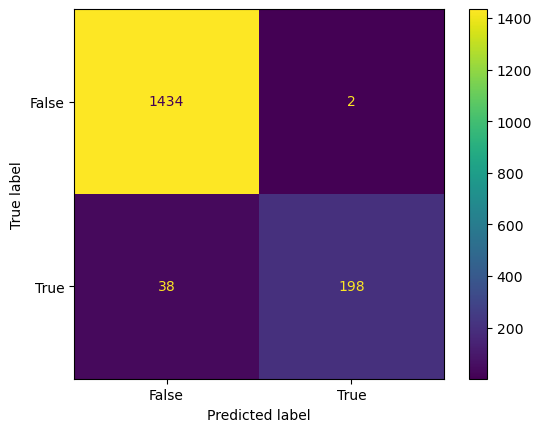

In [54]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =['False','True'])
cm_display.plot()
plt.show()
                                             

In [55]:
txt=input("Enter email text to classify: ")
for word in txt:
     word.strip("1234567890!@#$%^&*()_+-=:;/<>,.?'/ ")
     s=word+" "
txt=" ".join(s)
lemmatizer = WordNetLemmatizer()
lemma_words = [lemmatizer.lemmatize(o) for o in txt]
txt="".join(lemma_words)

Enter email text to classify:  Hey you won lottery of $2000.Click on the link below to claim your free gifts and lottery and call to the number below


In [56]:
t=[txt]
x = cntVect.transform(t)

In [57]:
nb.predict(x.toarray())

array(['spam'], dtype='<U4')

In [58]:
sv.predict(x.toarray())

array(['ham'], dtype=object)